In [1]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing

import warnings
warnings.filterwarnings("ignore")

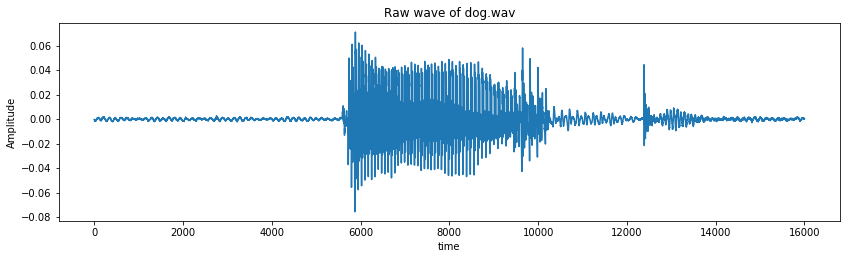

In [2]:
train_audio_path = "./train/train/audio/bed/"
samples, sample_rate = librosa.load(train_audio_path+'00f0204f_nohash_0.wav',sr=16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'dog.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)

In [3]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)

16000


In [4]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

['00176480_nohash_0.wav', '004ae714_nohash_0.wav', '004ae714_nohash_1.wav', '00f0204f_nohash_0.wav', '00f0204f_nohash_1.wav', '012c8314_nohash_0.wav', '012c8314_nohash_1.wav', '0132a06d_nohash_0.wav', '0135f3f2_nohash_0.wav', '0137b3f4_nohash_0.wav', '014f9f65_nohash_0.wav', '01648c51_nohash_0.wav', '01648c51_nohash_1.wav', '016e2c6d_nohash_0.wav', '01b4757a_nohash_0.wav', '01b4757a_nohash_1.wav', '01bcfc0c_nohash_0.wav', '0227998e_nohash_0.wav', '026290a7_nohash_0.wav', '02746d24_nohash_0.wav', '035de8fe_nohash_0.wav', '0362539c_nohash_0.wav', '0362539c_nohash_1.wav', '037c445a_nohash_0.wav', '0397ecda_nohash_0.wav', '03c96658_nohash_0.wav', '042186b8_nohash_0.wav', '042ea76c_nohash_0.wav', '0447d7c1_nohash_0.wav', '0474c92a_nohash_0.wav', '0474c92a_nohash_1.wav', '05739450_nohash_0.wav', '05b2db80_nohash_0.wav', '05d18852_nohash_0.wav', '06076b6b_nohash_0.wav', '060cd039_nohash_0.wav', '060cd039_nohash_1.wav', '063d48cf_nohash_0.wav', '063d48cf_nohash_1.wav', '0685264e_nohash_0.wav',

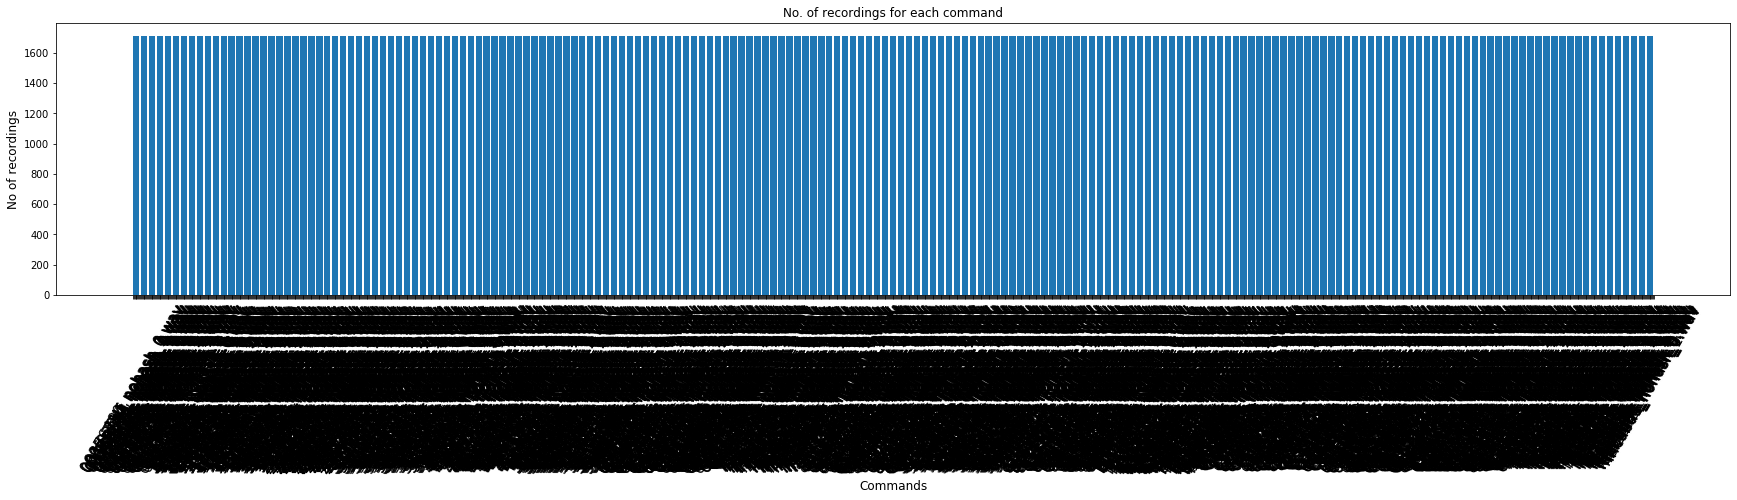

In [5]:

labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]

#for label in labels:
#    waves = [f for f in os.listdir(train_audio_path ) if f.endswith('.wav')]
#    print(waves)
#    no_of_recordings.append(len(waves))
    
waves = [f for f in os.listdir(train_audio_path ) if f.endswith('.wav')]
print(waves)
no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()


In [6]:

labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

In [7]:
train_audio_path = "./train/train/audio/"

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [9]:

from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

Using TensorFlow backend.


In [10]:

all_wave = np.array(all_wave).reshape(-1,8000,1)

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.3,random_state=777,shuffle=True)

In [13]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

In [14]:
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)
#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)
#Dense Layer 3
conv = Dense(64, activation='relu')(conv)
conv = Dropout(0.3)(conv)
#Dense Layer 4
conv = Dense(10, activation='relu')(conv)
conv = Dropout(0.3)(conv)



outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0  

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [17]:
history=model.fit(x_tr, y_tr ,epochs=15, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))


Train on 14918 samples, validate on 6394 samples
Epoch 1/15
14918/14918 [==============================] - 72s 5ms/step - loss: 2.3034 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0984
Epoch 2/15
14918/14918 [==============================] - 70s 5ms/step - loss: 2.3024 - accuracy: 0.1013 - val_loss: 2.3019 - val_accuracy: 0.0993
Epoch 3/15
14918/14918 [==============================] - 71s 5ms/step - loss: 2.2519 - accuracy: 0.1437 - val_loss: 2.1511 - val_accuracy: 0.1928
Epoch 4/15
14918/14918 [==============================] - 110s 7ms/step - loss: 2.1269 - accuracy: 0.1764 - val_loss: 1.9821 - val_accuracy: 0.2241
Epoch 5/15
14918/14918 [==============================] - 116s 8ms/step - loss: 2.0447 - accuracy: 0.1988 - val_loss: 1.9657 - val_accuracy: 0.2773
Epoch 6/15
14918/14918 [==============================] - 118s 8ms/step - loss: 1.9392 - accuracy: 0.2475 - val_loss: 1.8161 - val_accuracy: 0.3575
Epoch 7/15
14918/14918 [==============================] - 118s 8m

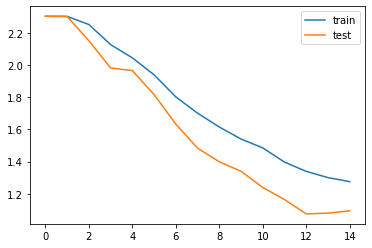

In [18]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

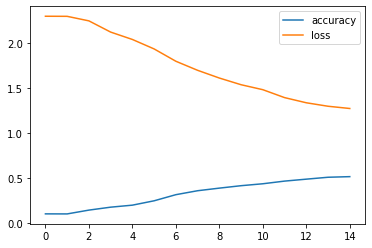

In [19]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['loss'], label='loss')
pyplot.legend()
pyplot.show()

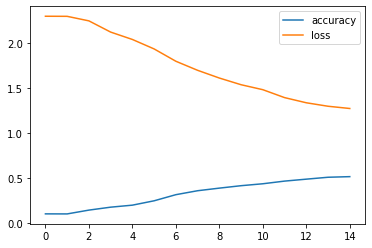

In [20]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['loss'], label='loss')
pyplot.legend()
pyplot.show()

In [21]:
from seaborn import heatmap

In [23]:
y_hat = model.predict(x_val)
model.evaluate(x_val, y_val)

6394/6394 [==============================] - 10s 2ms/step


[1.0943922747810968, 0.6137003302574158]

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
y_test_class = np.argmax(y_val,axis=1)
y_pred_class = np.argmax(y_hat,axis=1)

In [25]:
print(classification_report(y_test_class,y_pred_class))
C = confusion_matrix(y_test_class,y_pred_class)
print(C)

              precision    recall  f1-score   support

           0       0.45      0.25      0.32       646
           1       0.45      0.42      0.43       630
           2       0.53      0.64      0.58       650
           3       0.57      0.35      0.44       629
           4       0.74      0.70      0.72       643
           5       0.92      0.63      0.75       631
           6       0.92      0.74      0.82       647
           7       0.63      0.72      0.67       652
           8       0.45      0.82      0.58       619
           9       0.66      0.85      0.74       647

    accuracy                           0.61      6394
   macro avg       0.63      0.61      0.61      6394
weighted avg       0.63      0.61      0.61      6394

[[160 184  54 103   1   2   5  71  38  28]
 [ 99 263  23  58   1   6   0 113  57  10]
 [  0   1 415   1   1   2   5   3  51 171]
 [ 94 113  42 223   1   0   2  53  35  66]
 [  0   0  10   0 453  11   0   8 161   0]
 [  0   1  14   2 100 400 

Text(91.68, 0.5, 'true value')

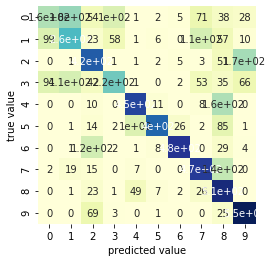

In [26]:
heatmap(C, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value')

In [27]:

def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [28]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: go


In [29]:
print("Text:",predict(samples))

Text: down


In [30]:
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='sigmoid', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='sigmoid', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='sigmoid', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='sigmoid', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)
#Dense Layer 1
conv = Dense(256, activation='sigmoid')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='sigmoid')(conv)
conv = Dropout(0.3)(conv)
#Dense Layer 3
conv = Dense(64, activation='sigmoid')(conv)
conv = Dropout(0.3)(conv)
#Dense Layer 4
conv = Dense(10, activation='sigmoid')(conv)
conv = Dropout(0.3)(conv)



outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0   

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [33]:
history=model.fit(x_tr, y_tr ,epochs=15, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Train on 14918 samples, validate on 6394 samples
Epoch 1/15
14918/14918 [==============================] - 122s 8ms/step - loss: 2.3112 - accuracy: 0.1039 - val_loss: 2.3026 - val_accuracy: 0.1017
Epoch 2/15
14918/14918 [==============================] - 121s 8ms/step - loss: 2.3039 - accuracy: 0.1005 - val_loss: 2.3025 - val_accuracy: 0.1017
Epoch 3/15
14918/14918 [==============================] - 79s 5ms/step - loss: 2.3034 - accuracy: 0.0959 - val_loss: 2.3025 - val_accuracy: 0.1017
Epoch 4/15
14918/14918 [==============================] - 73s 5ms/step - loss: 2.3034 - accuracy: 0.0979 - val_loss: 2.3025 - val_accuracy: 0.1017
Epoch 5/15
14918/14918 [==============================] - 73s 5ms/step - loss: 2.3029 - accuracy: 0.1036 - val_loss: 2.3025 - val_accuracy: 0.1006
Epoch 6/15
14918/14918 [==============================] - 77s 5ms/step - loss: 2.3030 - accuracy: 0.0987 - val_loss: 2.3025 - val_accuracy: 0.1010
Epoch 7/15
14918/14918 [==============================] - 76s 5ms/s

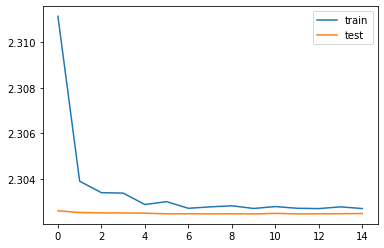

In [34]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [35]:

def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [36]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: right


In [37]:
print("Text:",predict(samples))

Text: down


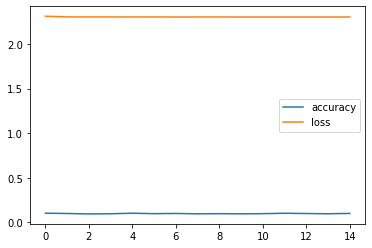

In [38]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['loss'], label='loss')
pyplot.legend()
pyplot.show()

In [39]:
from seaborn import heatmap

In [40]:
y_hat = model.predict(x_val)
model.evaluate(x_val, y_val)

6394/6394 [==============================] - 6s 906us/step


[2.3024718789782868, 0.10103221982717514]

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
y_test_class = np.argmax(y_val,axis=1)
y_pred_class = np.argmax(y_hat,axis=1)

In [42]:
print(classification_report(y_test_class,y_pred_class))
C = confusion_matrix(y_test_class,y_pred_class)
print(C)

              precision    recall  f1-score   support

           0       0.10      1.00      0.18       646
           1       0.00      0.00      0.00       630
           2       0.00      0.00      0.00       650
           3       0.00      0.00      0.00       629
           4       0.00      0.00      0.00       643
           5       0.00      0.00      0.00       631
           6       0.00      0.00      0.00       647
           7       0.00      0.00      0.00       652
           8       0.00      0.00      0.00       619
           9       0.00      0.00      0.00       647

    accuracy                           0.10      6394
   macro avg       0.01      0.10      0.02      6394
weighted avg       0.01      0.10      0.02      6394

[[646   0   0   0   0   0   0   0   0   0]
 [630   0   0   0   0   0   0   0   0   0]
 [650   0   0   0   0   0   0   0   0   0]
 [629   0   0   0   0   0   0   0   0   0]
 [643   0   0   0   0   0   0   0   0   0]
 [631   0   0   0   0   0 

Text(91.68, 0.5, 'true value')

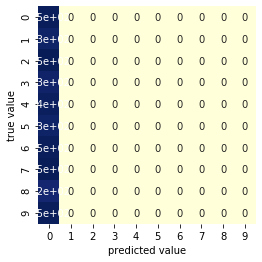

In [43]:
heatmap(C, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value')